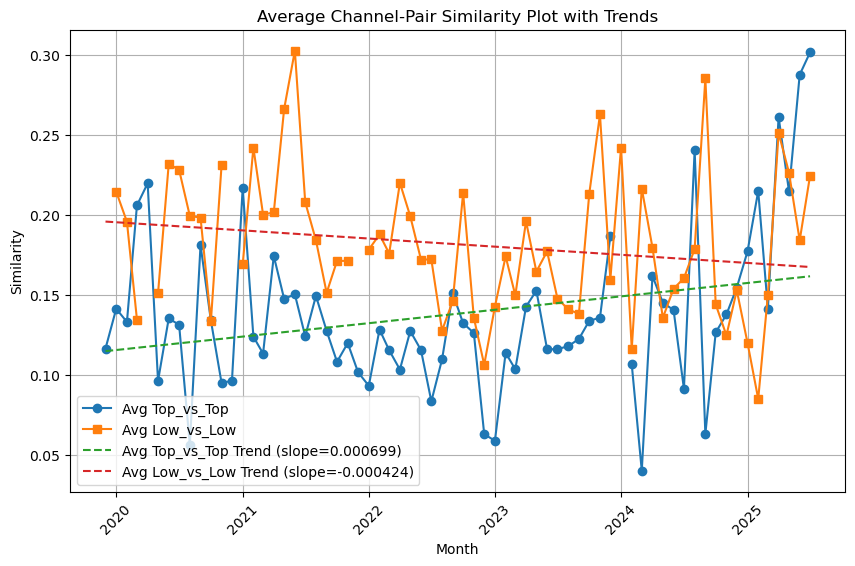

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load the detailed channel-pair similarity data
pair_df = pd.read_csv('output_csv/monthly_channel_pair_similarity.csv')

# Convert month to datetime for proper time series plotting
pair_df['month'] = pd.to_datetime(pair_df['month'])

# Sort by month to ensure order
pair_df = pair_df.sort_values('month')

# Calculate average similarity across all channel pairs for each month
monthly_avg = pair_df.groupby('month')[['Top_vs_Top', 'Low_vs_Low']].mean().reset_index()

# Interpolate missing values to avoid NaN in trend calculation
monthly_avg['Top_vs_Top_interp'] = monthly_avg['Top_vs_Top'].interpolate(method='linear', limit_direction='both')
monthly_avg['Low_vs_Low_interp'] = monthly_avg['Low_vs_Low'].interpolate(method='linear', limit_direction='both')

plt.figure(figsize=(10, 6))

# Plot the average lines
plt.plot(monthly_avg['month'], monthly_avg['Top_vs_Top'], label='Avg Top_vs_Top', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['Low_vs_Low'], label='Avg Low_vs_Low', marker='s')

# Add trend lines to visualize slope (using interpolated data)
x_num = np.arange(len(monthly_avg))
slope_top, intercept_top = np.polyfit(x_num, monthly_avg['Top_vs_Top_interp'], 1)
trend_top = slope_top * x_num + intercept_top
plt.plot(monthly_avg['month'], trend_top, label=f'Avg Top_vs_Top Trend (slope={slope_top:.6f})', linestyle='--')

slope_low, intercept_low = np.polyfit(x_num, monthly_avg['Low_vs_Low_interp'], 1)
trend_low = slope_low * x_num + intercept_low
plt.plot(monthly_avg['month'], trend_low, label=f'Avg Low_vs_Low Trend (slope={slope_low:.6f})', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Similarity')
plt.title('Average Channel-Pair Similarity Plot with Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Plot only the trend lines to visualize slopes
plt.plot(monthly_avg['month'], trend_top, label=f'Top_vs_Top Trend (slope={slope_top:.6f})', linestyle='--')
plt.plot(monthly_avg['month'], trend_low, label=f'Low_vs_Low Trend (slope={slope_low:.6f})', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Similarity')
plt.title('Similarity Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_272641/2390173871.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


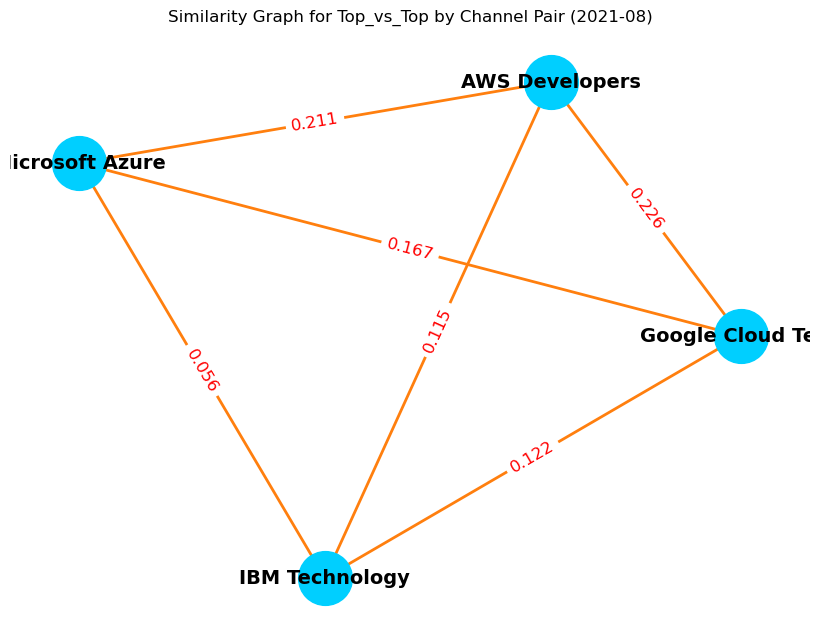

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

# Use the detailed channel-pair similarity data
pair_df = pd.read_csv('output_csv/monthly_channel_pair_similarity.csv')
pair_df['month'] = pd.to_datetime(pair_df['month'])

# Select the specific month to visualize (August 2021)
selected_month = pd.Timestamp('2021-08-01')
month_data = pair_df[pair_df['month'] == selected_month]

# Get all unique channels present in the selected month
channels = sorted(set(month_data['channel_1']).union(set(month_data['channel_2'])))

# Create undirected graph with channel nodes
G = nx.Graph()
for node in channels:
    G.add_node(node, style='filled', fillcolor='#00cfff', fontcolor='black')

# Add edges with actual Top_vs_Top similarity for each channel pair
for _, row in month_data.iterrows():
    ch1 = row['channel_1']
    ch2 = row['channel_2']
    sim = row['Top_vs_Top']
    if not pd.isna(sim):
        G.add_edge(ch1, ch2, weight=sim, color='#ff7f0e', style='solid')

# Draw the graph with improved style
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='#00cfff', font_size=14, font_weight='bold', edge_color='#ff7f0e', width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.3f}' for k, v in edge_labels.items()}, font_color='red', font_size=12)
plt.title('Similarity Graph for Top_vs_Top by Channel Pair (2021-08)')
plt.axis('off')
plt.tight_layout()
plt.show()